In [3]:
%cd ..

C:\Users\amcga\GitHub\episim


In [4]:
from epi_model import *
tnets = [
    temporalNetwork.load('high school').range(1,2),
    temporalNetwork.load('high school2')
]

In [5]:
def friendCloseChain_5(sim, vaccinateN=100):
    return sampling.friendCloseChain(sim, vaccinateN, 0.5)

def friendHighDegRandTop3(sim, vaccinateN):
    return sampling.friendHighDegRandTopN(sim, vaccinateN, N=3)
def friendHighDegRandTop5(sim, vaccinateN):
    return sampling.friendHighDegRandTopN(sim, vaccinateN, N=5)

In [6]:
tnet = tnets[0]

In [7]:
p = dict(params.covid_estimate)
p['s2e'] = params.daily_to_momentary(tnet, 0.1)
sim = simulations.SEIR_daily(tnet, p)

In [8]:
N_TO_GET = int(0.10 * tnet.Nnodes)

In [21]:
def friendHighDegNormalErr10(sim, vaccinateN):
    return sampling.friendHighDegNormalErr(sim, vaccinateN, sigma=10)
def friendHighDegNormalErr20(sim, vaccinateN):
    return sampling.friendHighDegNormalErr(sim, vaccinateN, sigma=20)

In [20]:
ktransfer = dict(zip(
"""friendChain
friendHighDegChain
local_betweenness
targeted
friendHighDeg
friend
friendHighDegRandTop3
friendHighDegRandTop5
friendHighDegNormalErr10
friendHighDegNormalErr20""".split("\n"), 
"""NR(c)
NP(c)
B
D
NP
NR
NP(N=3)
NP(N=5)
NP(ε=10)
NP(ε=20)""".split("\n")
))

In [25]:
strats = [
    sampling.friend,
    sampling.friendHighDeg,
    sampling.targeted,
    #sampling.none,
    #sampling.rand,
    #sampling.friendHighDegClose,
    #sampling.friendClose,
    #sampling.local_betweenness,
    #sampling.nominate_local_betweenness,
    sampling.friendHighDegChain,
    sampling.friendChain,
    #sampling.friendCloseChain,
    #friendCloseChain_5,
    #sampling.friendHighDegCloseChain,
    #sampling.friendWeightedChain,
    #sampling.friendWeighted,
    friendHighDegRandTop3,
    friendHighDegRandTop5,
    friendHighDegNormalErr10,
    friendHighDegNormalErr20
]

In [63]:
db = defaultdict(list)
for s in reversed(strats):
    sn = s.__name__
    print(sn)

    for i in range(500):
        val = s(sim, N_TO_GET)
        db[ktransfer[sn]].append(val)

friendHighDegNormalErr20
friendHighDegNormalErr10
friendHighDegRandTop5
friendHighDegRandTop3
friendChain
friendHighDegChain
targeted
friendHighDeg
friend


In [36]:
ks = """NR
NR(c)
NP(ε=10)
NP(ε=20)
NP(N=3)
NP(N=5)
NP
NP(c)
D""".split("\n")

In [30]:
mat = np.zeros( (len(ks),len(ks)) )

for i1, k1 in enumerate(ks):
    for i2, k2 in enumerate(ks):
        
        overlaps = []
        for j in range(50):
            s1 = set( db[k1][j] )
            s2 = set( db[k2][j] )
            
            overlap = len(s1.intersection(s2))
            overlaps.append(overlap / N_TO_GET)
            
        mat[i1,i2] = np.mean(overlaps)

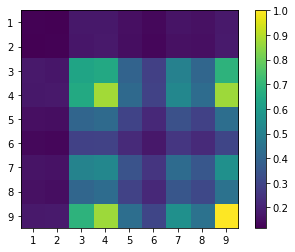

In [37]:
plt.imshow(mat)
plt.colorbar();
plt.xticks(
    range(len(ks)),
    [x+1 for x in range(len(ks))],
);

plt.yticks(
    range(len(ks)),
    [x+1 for x in range(len(ks))],
);

In [39]:
mat = np.zeros( (len(ks),len(ks)) )

for i1, k1 in enumerate(ks):
    for i2, k2 in enumerate(ks):
        
        overlaps = []
        for j in range(500):
            s1 = set( db[k1][j] )
            s2 = set( db[k2][(j+1)%500] )
            
            overlap = len(s1.intersection(s2))
            overlaps.append(overlap)
            
        mat[i1,i2] = np.mean(overlaps) / N_TO_GET

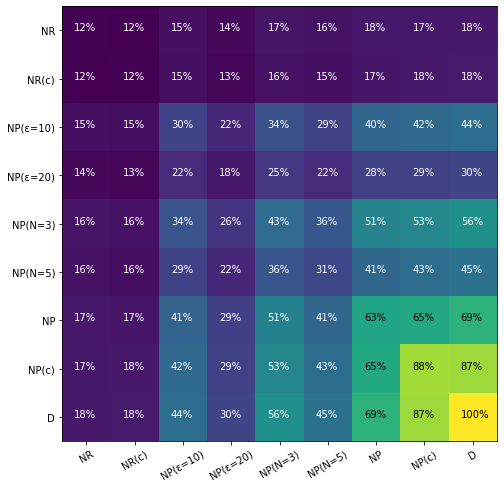

In [41]:
plt.figure(figsize=(8,8))
plt.imshow(mat)
#lt.colorbar();
plt.xticks(
    range(len(ks)),
    ks,
    rotation=30
);

plt.yticks(
    range(len(ks)),
    #x+1 for x in range(len(ks))],
    ks
);

for i1, k1 in enumerate(ks):
    for i2, k2 in enumerate(ks):
        v = mat[i1,i2]
        plt.text( i1-0.25, i2, f"{v:0.0%}", color='white' if v < 0.6 else 'black' )

1. friend
2. friendChain
3. friendHighDeg
4. friendHighDegChain
5. local_betweenness
6. targeted

In [16]:
for i,k in enumerate(ks):
    print(f"{i+1}. {k}")

1. NR
2. NR(c)
3. NP
4. NP(c)
5. B
6. D


# HS-2

In [66]:
tnet = tnets[1]

In [67]:
p = dict(params.covid_estimate)
p['s2e'] = params.daily_to_momentary(tnet, 0.1)
sim = simulations.SEIR_daily(tnet, p)

In [68]:
N_TO_GET = int(0.10 * tnet.Nnodes)

In [69]:
db = defaultdict(list)
for s in reversed(strats):
    sn = s.__name__
    print(sn)

    for i in range(500):
        val = s(sim, N_TO_GET)
        db[ktransfer[sn]].append(val)

friendHighDegNormalErr20
friendHighDegNormalErr10
friendHighDegRandTop5
friendHighDegRandTop3
friendChain
friendHighDegChain
targeted
friendHighDeg
friend


In [70]:
mat = np.zeros( (len(ks),len(ks)) )

for i1, k1 in enumerate(ks):
    for i2, k2 in enumerate(ks):
        
        overlaps = []
        for j in range(500):
            s1 = set( db[k1][j] )
            s2 = set( db[k2][(j+1)%500] )
            
            overlap = len(s1.intersection(s2))
            overlaps.append(overlap)
            
        mat[i1,i2] = np.mean(overlaps) / N_TO_GET

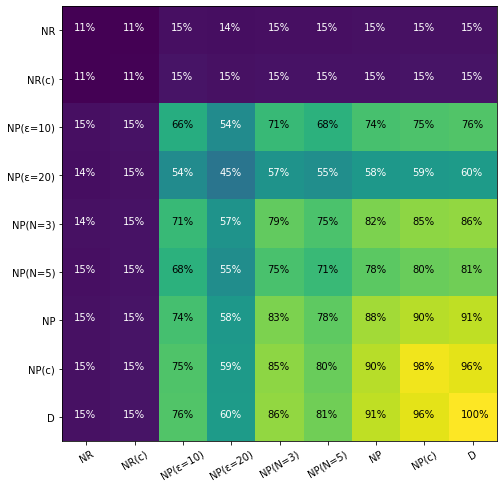

In [71]:
plt.figure(figsize=(8,8))
plt.imshow(mat)
#lt.colorbar();
plt.xticks(
    range(len(ks)),
    ks,
    rotation=30
);

plt.yticks(
    range(len(ks)),
    #x+1 for x in range(len(ks))],
    ks
);

for i1, k1 in enumerate(ks):
    for i2, k2 in enumerate(ks):
        v = mat[i1,i2]
        plt.text( i1-0.25, i2, f"{v:0.0%}", color='white' if v < 0.6 else 'black' )

# Synthetic

In [72]:
from simulation_manager import simulation_manager

In [73]:
manager = simulation_manager()
manager.load_models('synthetic_3')

In [74]:
nodes = sorted(manager.G.nodes)
edges = sorted(manager.G.edges(data='weight'))
tnet = weightedNetwork(nodes, edges)

In [75]:
N_TO_GET = int(0.10 * tnet.Nnodes)

In [76]:
p = dict(params.covid_estimate)
p['s2e'] = params.daily_to_momentary(tnet, 0.1)
sim = simulations.SEIR_daily(tnet, p)

In [77]:
db = defaultdict(list)
for s in reversed(strats):
    sn = s.__name__
    print(sn)

    for i in range(500):
        val = s(sim, N_TO_GET)
        db[ktransfer[sn]].append(val)

friendHighDegNormalErr20
friendHighDegNormalErr10
friendHighDegRandTop5
friendHighDegRandTop3
friendChain
friendHighDegChain
targeted
friendHighDeg
friend


In [79]:
mat = np.zeros( (len(ks),len(ks)) )

for i1, k1 in enumerate(ks):
    for i2, k2 in enumerate(ks):
        
        overlaps = []
        for j in range(500):
            s1 = set( db[k1][j] )
            s2 = set( db[k2][(j+1)%500] )
            
            overlap = len(s1.intersection(s2))
            overlaps.append(overlap)
            
        mat[i1,i2] = np.mean(overlaps) / N_TO_GET

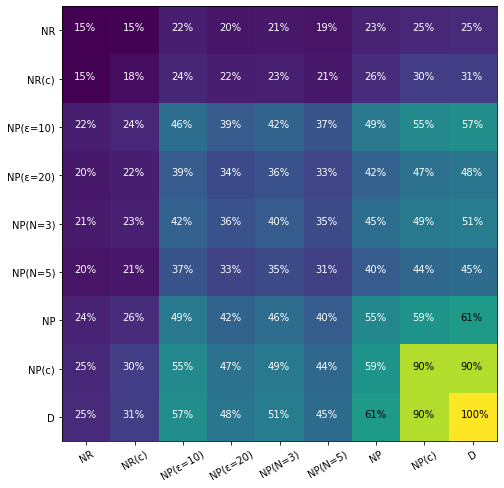

In [80]:
plt.figure(figsize=(8,8))
plt.imshow(mat)
#lt.colorbar();
plt.xticks(
    range(len(ks)),
    ks,
    rotation=30
);

plt.yticks(
    range(len(ks)),
    #x+1 for x in range(len(ks))],
    ks
);

for i1, k1 in enumerate(ks):
    for i2, k2 in enumerate(ks):
        v = mat[i1,i2]
        plt.text( i1-0.25, i2, f"{v:0.0%}", color='white' if v < 0.6 else 'black' )

# distributions within?

In [17]:
db = defaultdict(list)
for s in reversed(strats):
    sn = s.__name__

    for i in range(100):
        val = s(sim, N_TO_GET)
        db[sn].append(val)

In [18]:
[len(x) for x in db.values()]

[100, 100, 100, 100, 100, 100]

In [19]:
## plt.figure(figsize=(10,10))

mat = defaultdict(list)

for i1, k1 in enumerate(ks):
    for i2, k2 in enumerate(ks):
        
        overlaps = []
        for j in range(100):
            s1 = set( db[k1][j] )
            s2 = set( db[k2][j] )
            
            overlap = len(s1.intersection(s2))
            overlaps.append(overlap / N_TO_GET)
            
        plt.subplot(len(ks), len(ks), i1*len(ks)+i2+1)
        plt.hist( overlaps, bins=10 )
        plt.xlim(-0.1,1.1)
        
        plt.xticks([0,1],[])
        plt.yticks([])

IndexError: list index out of range